<a href="https://colab.research.google.com/github/babupallam/Machine-Learning-ML-05--Model-Evaluation-and-Performace-Testing/blob/main/04_Cross_Validation_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cross-Validation Techniques


- Cross-validation is a critical technique in model evaluation, offering a reliable way to assess how well a model generalizes to unseen data. Different cross-validation techniques serve different purposes depending on the nature of the data, especially when dealing with imbalanced datasets or time series data.



# 1  K-Fold Cross-Validation


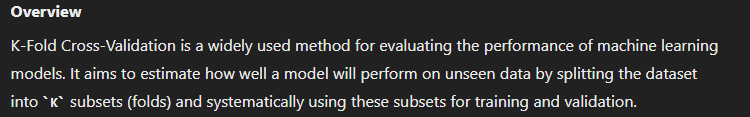

### Motivation and Importance

  - In machine learning, the goal is to create models that generalize well to new data.
  


> Traditional methods like train-test splits can lead to biased performance estimates because the model’s performance heavily depends on the specific split of the data.




  - K-Fold Cross-Validation mitigates this by averaging the performance over multiple splits, providing a more reliable estimate of the model’s generalization ability.

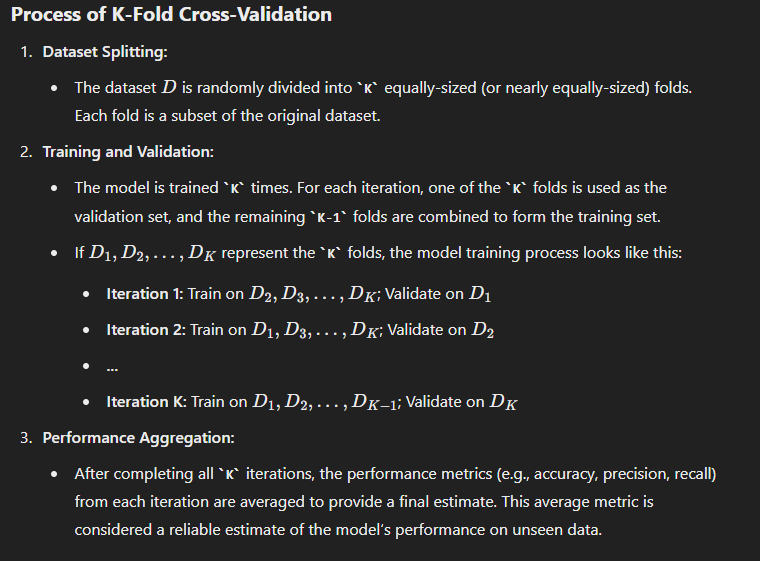

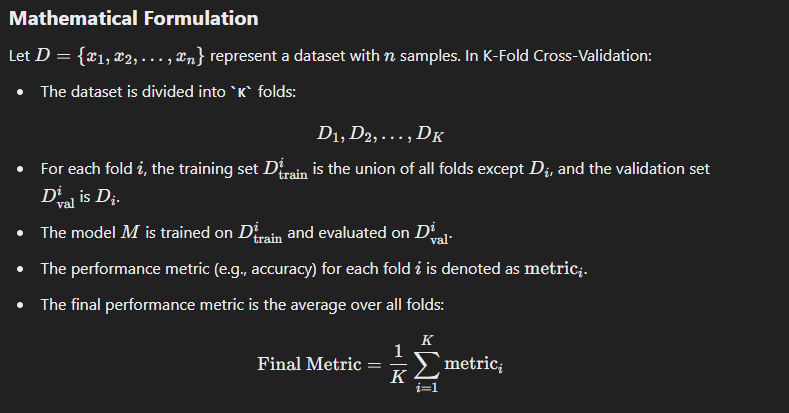

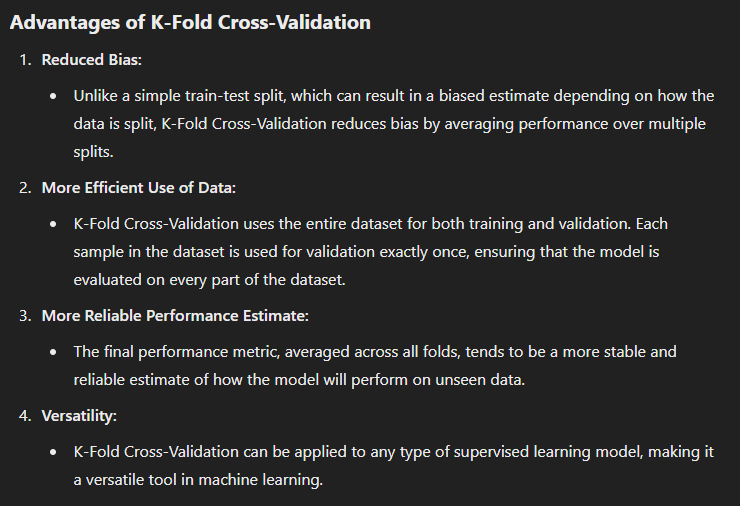

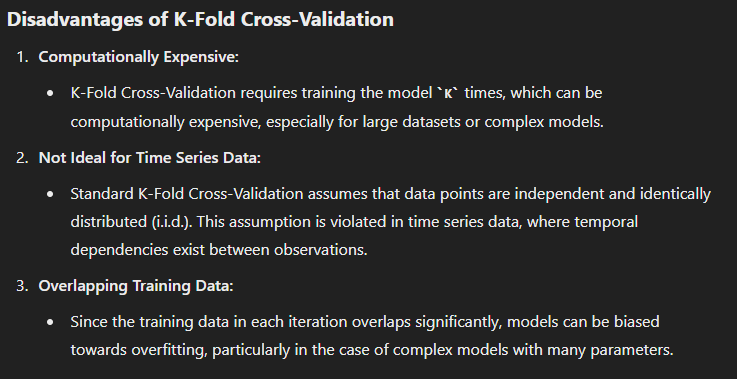

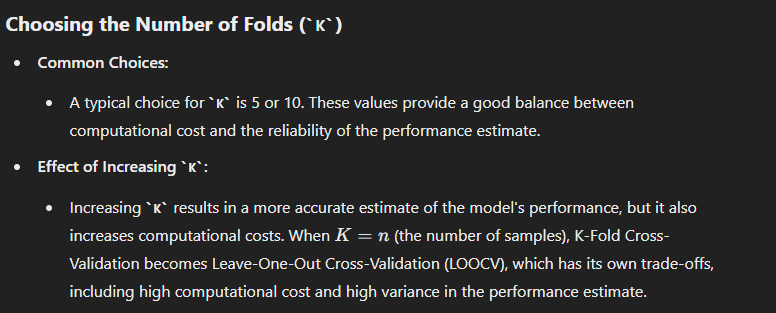

### Practical Implementation

In [4]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Step 2: Load the Dataset

# Load Iris dataset from sklearn's built-in datasets
# This dataset is a classic dataset used in pattern recognition, consisting of 150 samples of iris flowers with 4 features each
iris = load_iris()

# Assign the feature data (X) and the target labels (y)
# X contains the 4 features (sepal length, sepal width, petal length, petal width)
# y contains the target labels (the species of iris, which are 0, 1, 2)
X = iris.data  # Features
y = iris.target  # Target labels

# Set Up K-Fold Cross-Validation
# We will set up K-Fold Cross-Validation with K=5.

# Initialize K-Fold Cross-Validation with 5 folds
# n_splits=5 means that the data will be split into 5 subsets (folds)
# shuffle=True ensures that the data is shuffled before splitting, which helps to make each fold more representative of the whole dataset
# random_state=1 is a seed value that ensures the shuffling is consistent across runs (for reproducibility)
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Step 4: Train and Validate the Model

# Initialize the Logistic Regression model
# max_iter=200 sets the maximum number of iterations to 200, which is a safeguard to ensure the model converges during training
model = LogisticRegression(max_iter=200)

# List to store the accuracy for each fold
# We will use this list to keep track of the accuracy score for each fold
accuracy_list = []

# Perform K-Fold Cross-Validation
# This loop will iterate over each fold (5 iterations, since n_splits=5)
for train_index, val_index in kf.split(X):
    # Split the data into training and validation sets based on the current fold indices
    # train_index contains the indices of the training samples
    # val_index contains the indices of the validation samples
    X_train, X_val = X[train_index], X[val_index]  # Training and validation features
    y_train, y_val = y[train_index], y[val_index]  # Training and validation labels

    # Train the model on the training data
    # This step fits the Logistic Regression model using the training data (X_train and y_train)
    model.fit(X_train, y_train)

    # Make predictions on the validation data
    # The trained model is now used to predict the target labels for the validation data (X_val)
    y_pred = model.predict(X_val)

    # Calculate the accuracy for this fold
    # accuracy_score compares the true labels (y_val) with the predicted labels (y_pred) and returns the accuracy as a float
    accuracy = accuracy_score(y_val, y_pred)

    # Append the accuracy of this fold to the list
    accuracy_list.append(accuracy)

    # Print the accuracy of the current fold
    print(f'Fold accuracy: {accuracy:.4f}')

# Calculate and print the average accuracy across all folds
# np.mean() computes the mean of the accuracy scores stored in accuracy_list
# The average accuracy gives a more reliable estimate of the model's performance across the different folds
average_accuracy = np.mean(accuracy_list)
print(f'\nAverage Accuracy: {average_accuracy:.4f}')


Fold accuracy: 0.9667
Fold accuracy: 0.9667
Fold accuracy: 0.9333
Fold accuracy: 0.9333
Fold accuracy: 1.0000

Average Accuracy: 0.9600


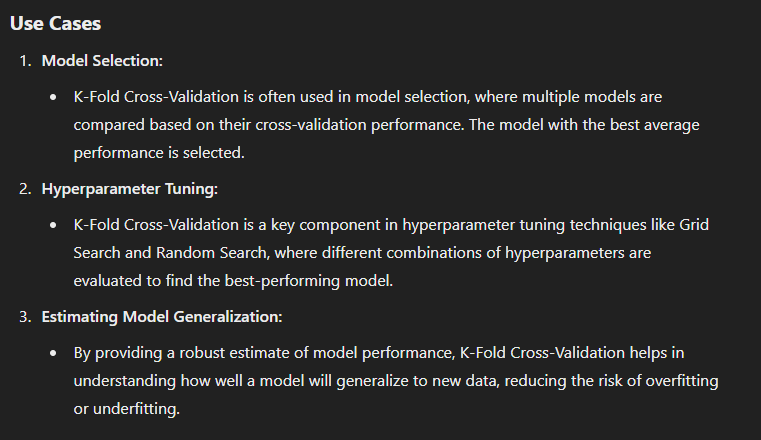

# 2. Stratified K-Fold Cross-Validation

Stratified K-Fold Cross-Validation is an extension of the traditional K-Fold Cross-Validation technique, specifically designed to handle datasets with imbalanced class distributions. In typical classification problems, especially those involving binary or multiclass labels, it's common to encounter situations where certain classes are underrepresented. Standard K-Fold Cross-Validation might not maintain the original class distribution in each fold, which can lead to biased model performance metrics. Stratified K-Fold Cross-Validation addresses this issue by ensuring that each fold maintains the same proportion of class labels as in the original dataset.

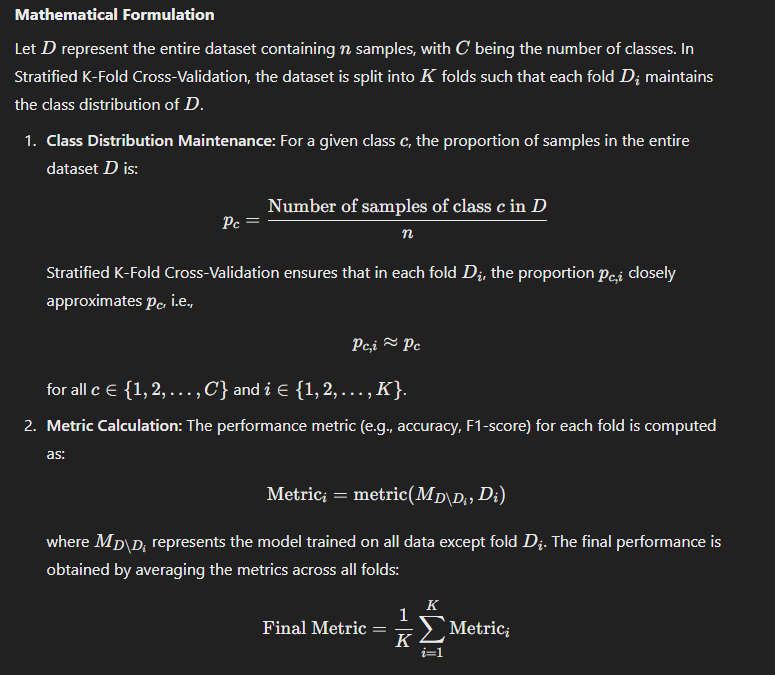

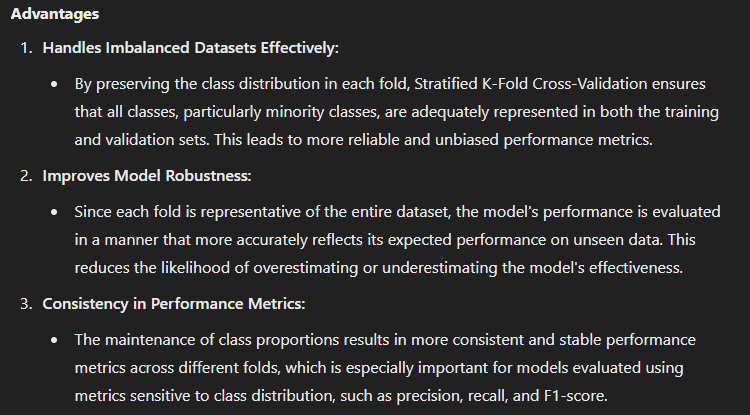

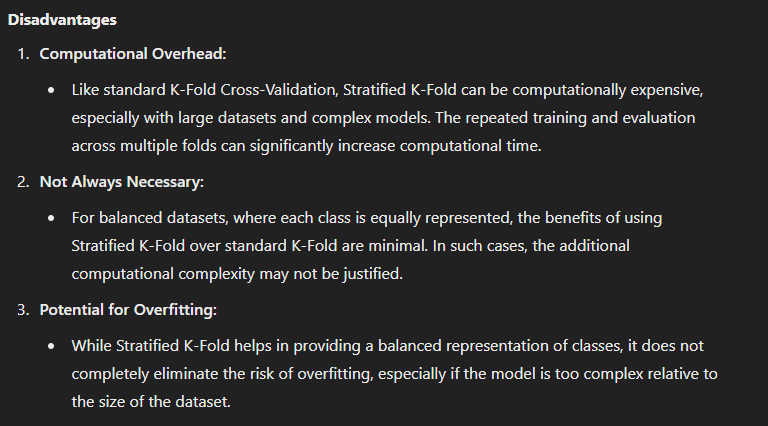

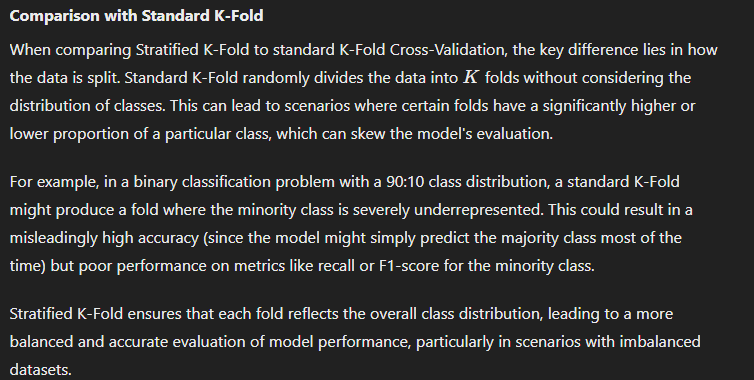

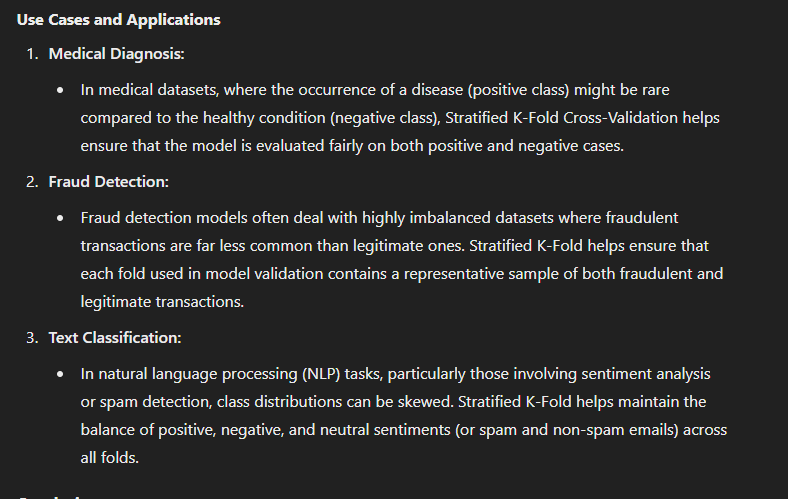

## Practical Implementation

In [5]:
# Import necessary modules
from sklearn.model_selection import StratifiedKFold  # For Stratified K-Fold Cross-Validation
from sklearn.datasets import load_iris  # To load the Iris dataset
from sklearn.linear_model import LogisticRegression  # For Logistic Regression model
from sklearn.metrics import accuracy_score  # To calculate accuracy score

# Load a sample dataset (Iris)
data = load_iris()  # The Iris dataset is a small, classic dataset used for classification
X = data.data  # Features (input variables)
y = data.target  # Target (output labels)

# Initialize the Stratified K-Fold Cross-Validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# n_splits=5: The dataset will be split into 5 folds
# shuffle=True: The data is shuffled before splitting into folds to ensure random distribution
# random_state=42: A fixed random seed for reproducibility

# Initialize a model
model = LogisticRegression()  # We are using Logistic Regression for this classification task

# List to hold accuracy scores for each fold
accuracies = []  # This list will store the accuracy of the model for each fold

# Perform Stratified K-Fold Cross-Validation
for train_index, test_index in skf.split(X, y):
    # skf.split(X, y): Splits the data into training and testing indices for each fold
    # train_index, test_index: Indices for the training and testing sets for this fold

    X_train, X_test = X[train_index], X[test_index]  # Extract training and testing features
    y_train, y_test = y[train_index], y[test_index]  # Extract training and testing labels

    # Train the model
    model.fit(X_train, y_train)  # Fit the model on the training data

    # Predict on the test set
    y_pred = model.predict(X_test)  # Make predictions on the test data

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)  # Compute accuracy for this fold
    accuracies.append(accuracy)  # Append the accuracy to the list of accuracies

# Calculate the average accuracy across all folds
average_accuracy = sum(accuracies) / len(accuracies)  # Compute the mean accuracy over all folds
print(f'Average Accuracy: {average_accuracy:.4f}')  # Print the average accuracy rounded to 4 decimal places


Average Accuracy: 0.9667


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

# 3.  Leave-One-Out Cross-Validation (LOOCV)

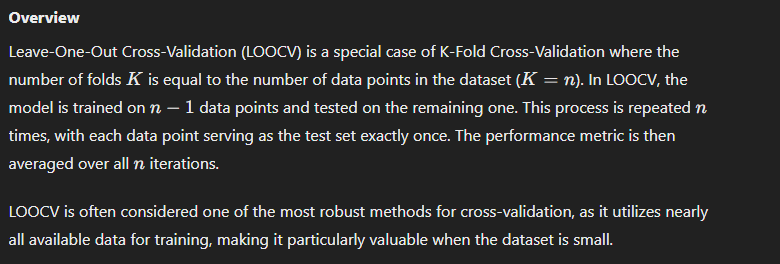

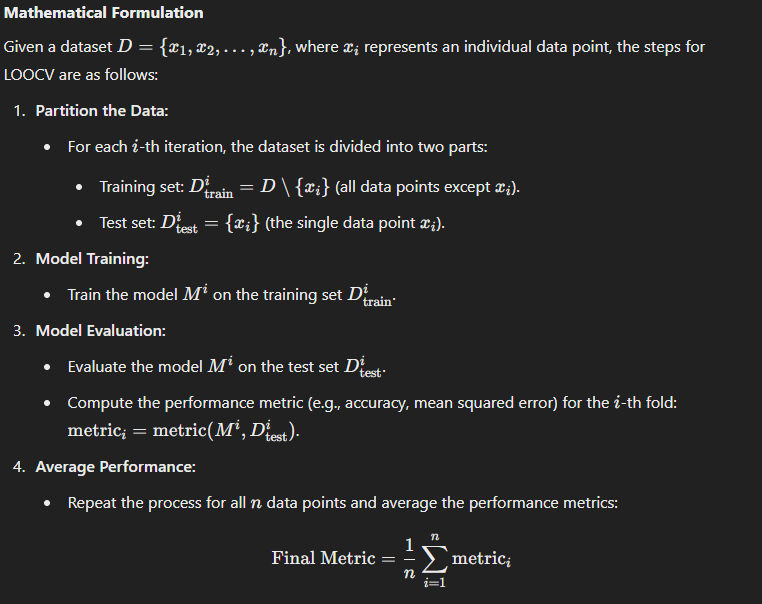

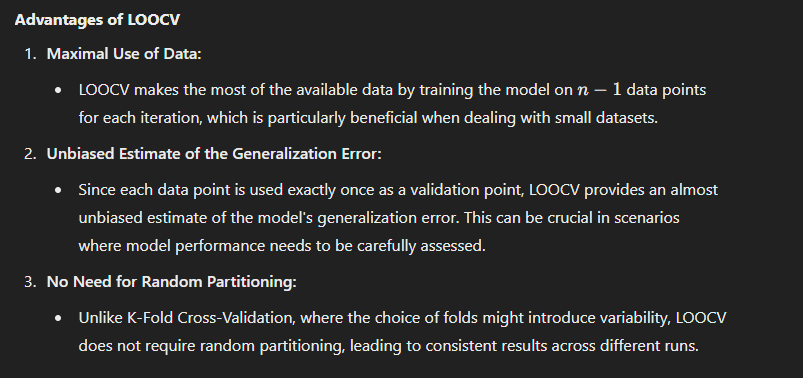

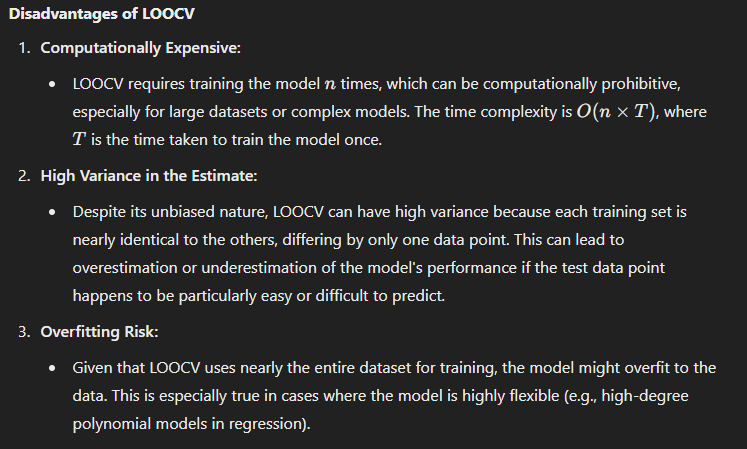

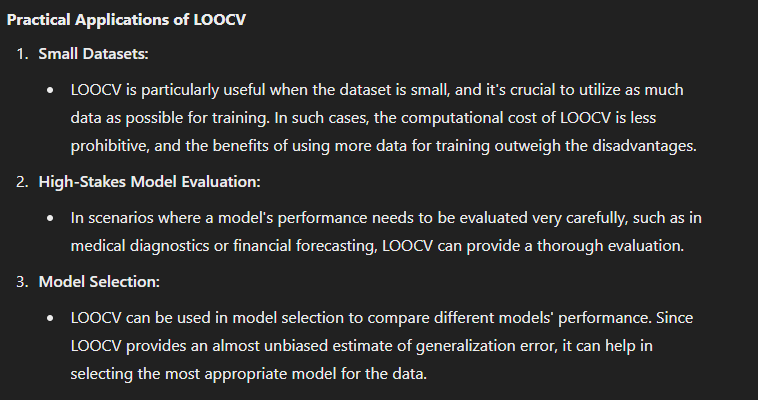

## implementation

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Iris dataset from sklearn's built-in datasets
iris = load_iris()

# Filter the dataset to include only two classes (binary classification)
# The original Iris dataset has three classes (0, 1, 2), but we remove class 2 for simplicity
X = iris.data[iris.target != 2]  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target[iris.target != 2]  # Labels (class 0 or 1)

# Initialize the Leave-One-Out Cross-Validation (LOOCV) object
# LOOCV will split the data so that each data point is used once as a test set, with the rest used for training
loo = LeaveOneOut()

# Initialize the Logistic Regression model
model = LogisticRegression()

# Initialize empty lists to store accuracy scores for both training and test sets from each iteration of LOOCV
train_accuracies = []
test_accuracies = []

# Perform the LOOCV process
# The loo.split(X) method generates indices for training and test sets for each iteration
for train_index, test_index in loo.split(X):
    # Split the dataset into training and test sets based on the current LOOCV split
    X_train, X_test = X[train_index], X[test_index]  # Training data and test data
    y_train, y_test = y[train_index], y[test_index]  # Training labels and test label

    # Train the Logistic Regression model on the training data
    model.fit(X_train, y_train)

    # Predict the labels for the training data to calculate training accuracy
    # This helps in assessing how well the model fits the training data
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    # Predict the label for the test data to calculate test accuracy
    # Since LOOCV uses one data point as the test set, this accuracy reflects the model's generalization ability
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

# Calculate the average accuracy for both training and test sets across all LOOCV iterations
average_train_accuracy = sum(train_accuracies) / len(train_accuracies)
average_test_accuracy = sum(test_accuracies) / len(test_accuracies)

# Output the average accuracies for the training and test sets
print(f"Average Training Accuracy: {average_train_accuracy}")
print(f"Average Test (LOOCV) Accuracy: {average_test_accuracy}")

# Check for overfitting by comparing the average training accuracy with the average test accuracy
# If the model performs significantly better on the training set than on the test set, it may be overfitting
if average_train_accuracy > average_test_accuracy:
    print("The model may be overfitting.")
else:
    print("The model does not appear to be overfitting.")


Average Training Accuracy: 1.0
Average Test (LOOCV) Accuracy: 1.0
The model does not appear to be overfitting.


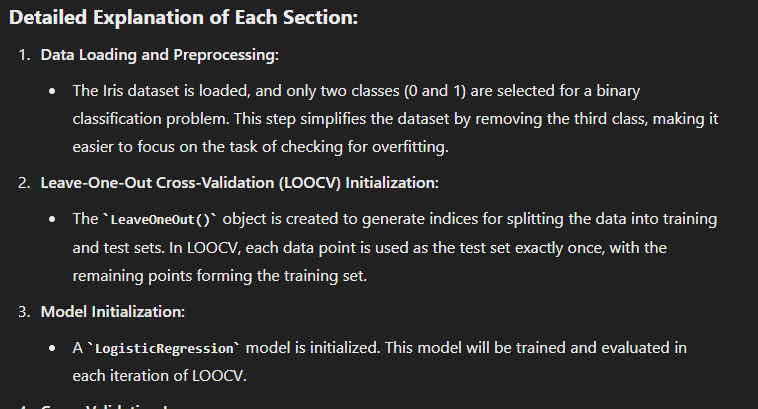

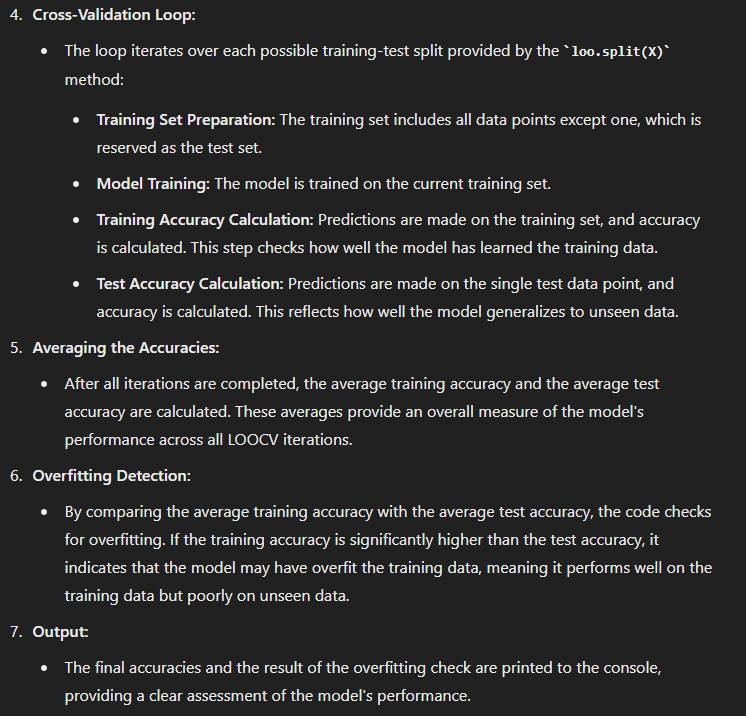